# Análise palavras fontes de dados

In [1]:
from fonte_dados.fabrica import FabricaFonteDados
from repository.mongo_utils import get_pages_content_collection
from repository.verbos import VerbosRepo
from repository.wikipedia import WikipediaRepo
from util import constants

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

## Obtenção de informações de palavras de fontes de dados

In [2]:
fabrica = FabricaFonteDados()
verbo_repo = VerbosRepo()
verbos_stemmed = verbo_repo.find_all_stemmed()

In [3]:
def obter_tokens_nao_verbo(documento):
    return [token for token in documento if token not in verbos_stemmed]

def obter_documentos_sem_verbo(documentos):
    return [obter_tokens_nao_verbo(documento) for documento in documentos]

def obter_tamanhos_documentos(documentos):
    return [len(doc) for doc in documentos]

In [4]:
def obter_informacoes_palavras(descricao_fonte_de_dados, limpar_stopwords_especificas=True):
    fonte_dados_origem = fabrica.get_fonte_dados(descricao_fonte_de_dados)
    fonte_dados_origem.carregar_dados(limpar_stopwords_especificas=limpar_stopwords_especificas)
    documentos_origem = fonte_dados_origem.get_tokens()
    tamanhos_documentos = obter_tamanhos_documentos(documentos_origem)
    documentos_sem_verbo = obter_documentos_sem_verbo(documentos_origem)
    tamanhos_sem_verbo = obter_tamanhos_documentos(documentos_sem_verbo)
    percentual_nao_verbo = 100 * (np.array(tamanhos_sem_verbo) / np.array(tamanhos_documentos))
    return pd.DataFrame(
        data = { 
            'documento': documentos_origem, 
            'tamanho': tamanhos_documentos, 
            'documento_nao_verbo': documentos_sem_verbo, 
            'tamanho_sem_verbo': tamanhos_sem_verbo,
            'percentual_nao_verbo': percentual_nao_verbo
        })

## Análises gráficas de palavras de fontes de dados

In [5]:
"""
Distribuicao de tokens que nao sao verbo nos documentos.
"""
def analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados):
    sns.displot(informacoes_fonte_de_dados, x='percentual_nao_verbo', kind='hist', aspect=1.2)

In [6]:
"""
Distribuicao de tamanhos de documentos diferenciando por conter verbo ou nao.
"""
def analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=False, x_max=5000):
    if bidimensional:
        tidy = informacoes_fonte_de_dados[informacoes_fonte_de_dados['tamanho'] <= x_max]
        sns.displot(tidy, x='tamanho', y='tamanho_sem_verbo', kind='hist', aspect=1.2, height=6)
    else:
        tidy = informacoes_fonte_de_dados[['tamanho', 'tamanho_sem_verbo']].melt().rename(columns={'variable': 'descricao_tamanho' })
        sns.displot(tidy, x='value', kind='hist', aspect=1.2, hue='descricao_tamanho', kde=True, multiple='dodge')

In [7]:
"""
Distribuicao de tamanhos dos documentos. O parametro indicador_tamanho eh usado para definir se o tamanho eh o original ou 
o tamanho sem verbo. Possiveis valores: 'tamanho', 'tamanho_sem_verbo'
"""
def analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho', x_max=5000):
    limitado = informacoes_fonte_de_dados[informacoes_fonte_de_dados[indicador_tamanho] <= x_max]
    sns.displot(limitado, x=indicador_tamanho, kind='hist', aspect=1.2)

## Análise palavras - Nerds Viajantes

In [8]:
informacoes_fonte_de_dados = obter_informacoes_palavras(constants.NERDS_VIAJANTES)

## Análise fonte de dados selecionada

### Distribuição de percentuais de tokens não verbo no documento

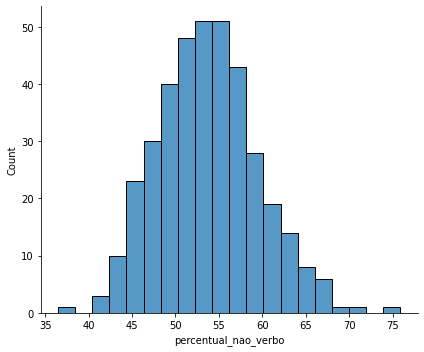

In [9]:
analisar_distribuicao_percentual_nao_verbo(informacoes_fonte_de_dados)

### Distribuição de tamanho de documento

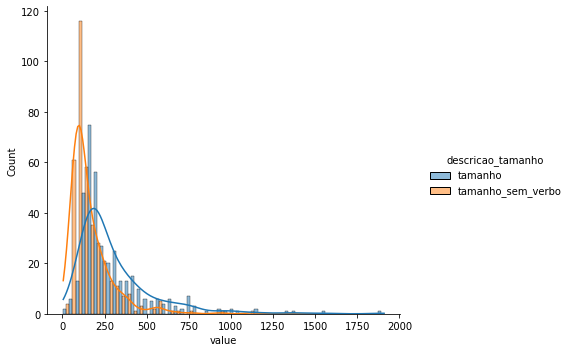

In [10]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados)

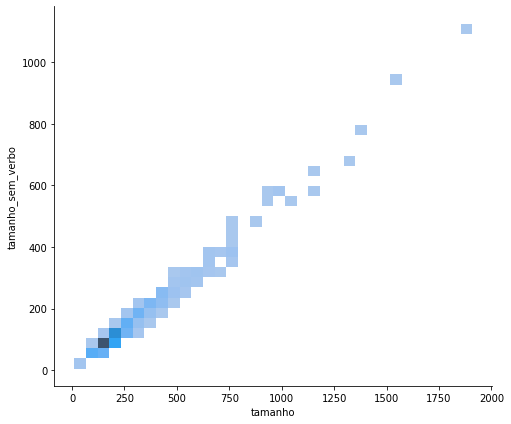

In [11]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True)

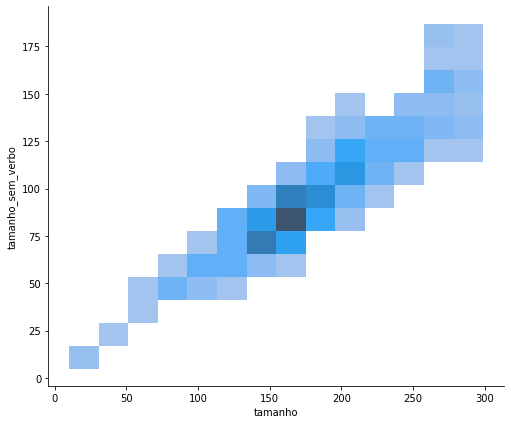

In [12]:
analisar_distribuicao_tamanhos_documentos(informacoes_fonte_de_dados, bidimensional=True, x_max=300)

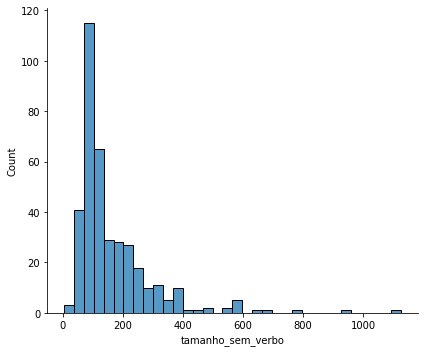

In [13]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho_sem_verbo')

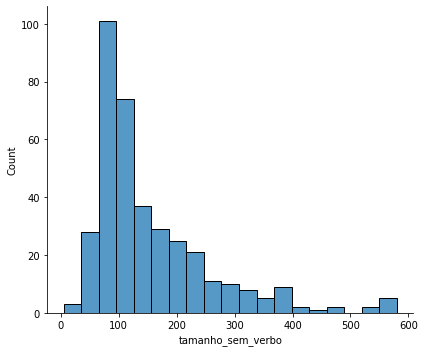

In [14]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, indicador_tamanho='tamanho_sem_verbo', x_max=600)

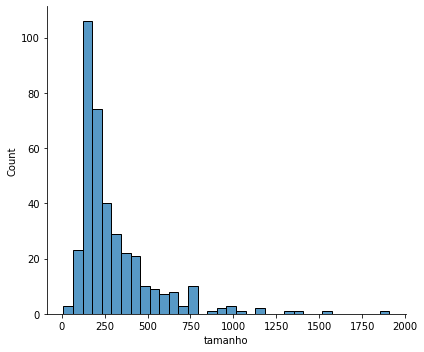

In [15]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados)

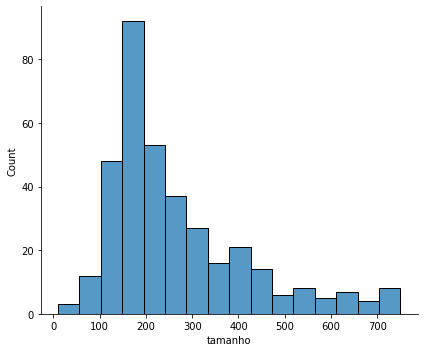

In [16]:
analisar_distribuicao_tamanhos(informacoes_fonte_de_dados, x_max=750)

## Análises Estatísticas de Fonte de Dados

In [18]:
def obter_todos_tokens(informacoes_fonte_de_dados, coluna_documento):
    documentos = list(informacoes_fonte_de_dados[coluna_documento].values)
    return [token for documento in documentos for token in documento]

In [19]:
"""
Exibicao de total geral dos tokens da coluna de documentos selecionada
"""
def exibir_total_tokens(todos_tokens, coluna_documento):
    print(f'O total de tokens de todos os documentos para a coluna "{coluna_documento}" eh {len(todos_tokens)}')

In [20]:
"""
Exibicao de top n tokens mais comuns, ordenados do mais frequente para o menos frequente
"""
def exibir_tokens_mais_comuns(todos_tokens, n=10):
    print(Counter(todos_tokens).most_common(n))

In [21]:
"""
Descricao estatistica dos tamanhos dos documentos no corpo. Exibe diversas informacoes estatisticas, como media, desvio padra, etc,
alem dos percentiles selecionados
"""
def analisar_tamanhos_documentos(informacoes_fonte_de_dados):
    print(informacoes_fonte_de_dados[['tamanho', 'tamanho_sem_verbo']].describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]))

## Análise estatística da fonte selecionada

### Contagem geral de tokens

In [22]:
todos_tokens = obter_todos_tokens(informacoes_fonte_de_dados, 'documento')
exibir_total_tokens(todos_tokens, 'documento')

O total de tokens de todos os documentos para a coluna "documento" eh 114801


In [23]:
todos_tokens_sem_verbo = obter_todos_tokens(informacoes_fonte_de_dados, 'documento_nao_verbo')
exibir_total_tokens(todos_tokens_sem_verbo, 'documento_nao_verbo')

O total de tokens de todos os documentos para a coluna "documento_nao_verbo" eh 61890


### Exibição de tokens mais frequentes

#### 10 tokens mais frequentes

In [24]:
print('10 Tokens mais comuns entre todos os tokens:')
exibir_tokens_mais_comuns(todos_tokens)

print('10 Tokens mais comuns eliminando os verbos:')
exibir_tokens_mais_comuns(todos_tokens_sem_verbo)

10 Tokens mais comuns entre todos os tokens:
[('fot', 1550), ('fic', 807), ('algum', 750), ('dia', 720), ('par', 660), ('caminh', 639), ('faz', 634), ('cheg', 611), ('pod', 599), ('visit', 581)]
10 Tokens mais comuns eliminando os verbos:
[('fot', 1550), ('algum', 750), ('dia', 720), ('passei', 560), ('parqu', 557), ('outr', 551), ('bem', 538), ('cidad', 534), ('muit', 502), ('temp', 484)]


#### 20 tokens mais frequentes

In [25]:
print('20 Tokens mais comuns entre todos os tokens:')
exibir_tokens_mais_comuns(todos_tokens, n=20)

print('20 Tokens mais comuns eliminando os verbos:')
exibir_tokens_mais_comuns(todos_tokens_sem_verbo, n=20)

20 Tokens mais comuns entre todos os tokens:
[('fot', 1550), ('fic', 807), ('algum', 750), ('dia', 720), ('par', 660), ('caminh', 639), ('faz', 634), ('cheg', 611), ('pod', 599), ('visit', 581), ('fotograf', 566), ('passei', 560), ('parqu', 557), ('trilh', 554), ('outr', 551), ('bem', 538), ('cidad', 534), ('pass', 526), ('muit', 502), ('hor', 489)]
20 Tokens mais comuns eliminando os verbos:
[('fot', 1550), ('algum', 750), ('dia', 720), ('passei', 560), ('parqu', 557), ('outr', 551), ('bem', 538), ('cidad', 534), ('muit', 502), ('temp', 484), ('tod', 441), ('pouc', 422), ('lag', 364), ('jalap', 361), ('águ', 353), ('aind', 350), ('bonit', 348), ('vist', 338), ('bel', 322), ('rio', 318)]


### Descrição estatística dos tamanhos dos documentos

In [26]:
analisar_tamanhos_documentos(informacoes_fonte_de_dados)

           tamanho  tamanho_sem_verbo
count   378.000000         378.000000
mean    303.706349         163.730159
std     234.920633         130.792671
min      10.000000           5.000000
5%      111.700000          57.700000
10%     133.000000          68.700000
25%     165.000000          84.000000
50%     216.000000         118.000000
75%     367.000000         204.750000
90%     589.200000         309.200000
95%     747.450000         392.150000
max    1909.000000        1125.000000


## Nuvem de palavras

In [28]:
def obter_texto_unico(informacoes_fonte_de_dados, coluna_documento):
    corpus = list(informacoes_fonte_de_dados[coluna_documento].values)
    corpus = [" ".join(documento) for documento in corpus]
    textao = " ".join(corpus)
    return textao

In [29]:
def gerar_nuvem_palavras(texto):
    wordcloud = WordCloud(background_color='white').generate(texto)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Nuvem de palavras da fonte selecionada

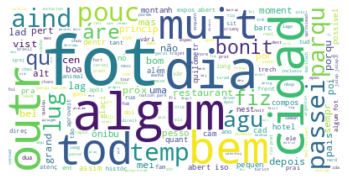

In [30]:
texto_unico_nao_verbo = obter_texto_unico(informacoes_fonte_de_dados, 'documento_nao_verbo')
gerar_nuvem_palavras(texto_unico_nao_verbo)

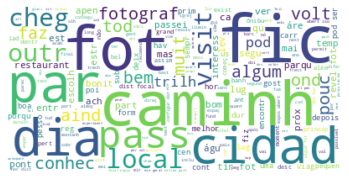

In [31]:
texto_unico = obter_texto_unico(informacoes_fonte_de_dados, 'documento')
gerar_nuvem_palavras(texto_unico)

## Análise de 100 palavras que mais aparecem

In [32]:
documentos = informacoes_fonte_de_dados['documento'].values

In [33]:
documentos[:5]

array([list(['prim', 'dia', 'santiag', 'tent', 'visit', 'mus', 'art', 'pré', 'colombi', 'cheg', 'local', 'depar', 'vár', 'mes', 'pesso', 'jog', 'cart', 'tarot', 'com', 'prim', 'dia', 'santiag', 'ach', 'situ', 'inusit', 'depois', 'vim', 'sup', 'comum', 'rua', 'cidad', 'procur', 'bilhet', 'mus', 'depar', 'plac', 'avis', 'mus', 'fech', 'reform', 'muit', 'trist', 'consult', 'sit', 'mus', 'perceb', 'fech', 'dia', 'dezembr', '2011', 'final', '2013', 'previs', 'dat', 'cert', 'reabr', 'ness', 'períod', 'espaç', 'mus', 'ampli', '1600', 'est', 'mudanç', 'permitir', 'aument', 'espaç', 'expos', 'mostr', 'públic', 'quas', 'dobr', 'coleç', 'patrimon', 'mus', 'coleç', 'mus', 'agrup', 'áre', 'cult', 'mesoamér', 'méxic', 'guatemal', 'hond', 'salv', 'part', 'nicarágu', 'interméd', 'colômb', 'equ', 'carib', 'mar', 'carib', 'antill', 'ama', 'selv', 'amazôn', 'and', 'centr', 'peru', 'bolív', 'and', 'sul', 'chil', 'argentin', 'vej', 'posicion', 'mus', 'através', 'map', 'seguint', 'par', 'quis', 'program', '